### Basic Project Plan
Here's an outline of your project plan:

- Task: Collect and analyze weather data across cities worldwide.
- Purpose: PlanMyTrip will use the data to recommend ideal hotels based on clients' weather preferences.
- Method: Create a Pandas DataFrame with 500 or more of the world's unique cities and their weather data in real time. This process will entail collecting, analyzing, and visualizing the data.

Your analysis of the data will be split into three main parts, or stages.

1. Collect the Data

- Use the NumPy module to generate more than 1,500 random latitudes and longitudes.
- Use the citipy module to list the nearest city to the latitudes and longitudes.
- Use the OpenWeatherMap API to request the current weather data from each unique city in your list.
- Parse the JSON data from the API request.
- Collect the following data from the JSON file and add it to a DataFrame:
    - City, country, and date
    - Latitude and longitude
    - Maximum temperature
    - Humidity
    - Cloudiness
    - Wind speed

2. Exploratory Analysis with Visualization

- Create scatter plots of the weather data for the following comparisons:
    - Latitude versus temperature
    - Latitude versus humidity
    - Latitude versus cloudiness
    - Latitude versus wind speed
- Determine the correlations for the following weather data:
    - Latitude and temperature
    - Latitude and humidity
    - Latitude and cloudiness
    - Latitude and wind speed
- Create a series of heatmaps using the Google Maps and Places API that showcases the following:
    - Latitude and temperature
    - Latitude and humidity
    - Latitude and cloudiness
    - Latitude and wind speed

3. Visualize Travel Data

Create a heatmap with pop-up markers that can display information on specific cities based on a customer's travel preferences. Complete these steps:

1. Filter the Pandas DataFrame based on user inputs for a minimum and maximum temperature.
2. Create a heatmap for the new DataFrame.
3. Find a hotel from the cities' coordinates using Google's Maps and Places API, and Search Nearby feature.
4. Store the name of the first hotel in the DataFrame.
5. Add pop-up markers to the heatmap that display information about the city, current maximum temperature, and a hotel in the city.

In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy



In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

### create a for loop that will do the following:

1. Iterate through the `coordinates`' zipped tuple.
2. Use `citipy.nearest_city()` and inside the parentheses of `nearest_city()`, add the latitude and longitude in this format: `coordinate[0], coordinate[1]`.
3. To print the `city name`, chain the `city_name` to the `nearest_city()` function.
4. To print the `country name`, chain the `country_code` to the `nearest_city()` function.

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

641

# Pseudocode outline

## Retrieving the weather data from 500+ cities.

We will need to do the following:

1. Import our dependencies and initialize counters and an empty list that will hold the weather data.
2. Loop through the cities list.
3. Group the cities in sets of 50 to log the process as we find the weather data for each city.
    - Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
4. Build the `city_url` or endpoint for each city.
5. Log the URL and the record and set numbers.
6. Make an API request for each city.
7. Parse the JSON weather data for the following:
    - City, country, and date
    - Latitude and longitude
    - Maximum temperature
    - Humidity
    - Cloudiness
    - Wind speed
8. Add the data to a list in a dictionary format and then convert the list to a DataFrame.

In [5]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | asau
Processing Record 2 of Set 1 | bredasdorp
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | alyangula
Processing Record 5 of Set 1 | lac-megantic
Processing Record 6 of Set 1 | port hardy
Processing Record 7 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 8 of Set 1 | yulara
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | arraial do cabo
Processing Record 11 of Set 1 | upernavik
Processing Record 12 of Set 1 | cap malheureux
Processing Record 13 of Set 1 | avarua
Processing Record 14 of Set 1 | taoudenni
Processing Record 15 of Set 1 | pacific grove
Processing Record 16 of Set 1 | monforte de lemos
Processing Record 17 of Set 1 | flinders
Processing Record 18 of Set 1 | lanxi
Processing Record 19 of Set 1 | kapaa
Processing Record 20 of Set 1 | sakakah
Processing Record 21 of Set 1 | aklavik
Processing Record 22 of Set 1 

Processing Record 37 of Set 4 | bilibino
Processing Record 38 of Set 4 | saint-philippe
Processing Record 39 of Set 4 | barguzin
Processing Record 40 of Set 4 | miraflores
Processing Record 41 of Set 4 | tual
Processing Record 42 of Set 4 | faya
Processing Record 43 of Set 4 | mocambique
City not found. Skipping...
Processing Record 44 of Set 4 | fort frances
Processing Record 45 of Set 4 | tomatlan
Processing Record 46 of Set 4 | saint-leu
Processing Record 47 of Set 4 | severo-kurilsk
Processing Record 48 of Set 4 | saskylakh
Processing Record 49 of Set 4 | grindavik
Processing Record 50 of Set 4 | bethel
Processing Record 1 of Set 5 | chatra
Processing Record 2 of Set 5 | srednekolymsk
Processing Record 3 of Set 5 | rafai
Processing Record 4 of Set 5 | muzhi
Processing Record 5 of Set 5 | porto novo
Processing Record 6 of Set 5 | charleston
Processing Record 7 of Set 5 | tapaua
City not found. Skipping...
Processing Record 8 of Set 5 | atambua
Processing Record 9 of Set 5 | camaqua


Processing Record 28 of Set 8 | baruun-urt
Processing Record 29 of Set 8 | barentsburg
City not found. Skipping...
Processing Record 30 of Set 8 | athens
Processing Record 31 of Set 8 | baykit
Processing Record 32 of Set 8 | dillon
Processing Record 33 of Set 8 | nishihara
Processing Record 34 of Set 8 | keuruu
Processing Record 35 of Set 8 | kindu
Processing Record 36 of Set 8 | musoma
Processing Record 37 of Set 8 | tura
Processing Record 38 of Set 8 | sorkjosen
Processing Record 39 of Set 8 | mocorito
Processing Record 40 of Set 8 | bradut
Processing Record 41 of Set 8 | bac lieu
Processing Record 42 of Set 8 | katghora
Processing Record 43 of Set 8 | athabasca
Processing Record 44 of Set 8 | saldanha
Processing Record 45 of Set 8 | palm valley
Processing Record 46 of Set 8 | lively
Processing Record 47 of Set 8 | myre
Processing Record 48 of Set 8 | walvis bay
Processing Record 49 of Set 8 | kodiak
Processing Record 50 of Set 8 | ingham
Processing Record 1 of Set 9 | haines junctio

Processing Record 16 of Set 12 | mixtepec
City not found. Skipping...
Processing Record 17 of Set 12 | mishima
Processing Record 18 of Set 12 | chimbote
Processing Record 19 of Set 12 | mayya
Processing Record 20 of Set 12 | kardla
Processing Record 21 of Set 12 | mercedes
Processing Record 22 of Set 12 | aksu
Processing Record 23 of Set 12 | oistins
Processing Record 24 of Set 12 | renqiu
Processing Record 25 of Set 12 | anadyr
Processing Record 26 of Set 12 | agapia
Processing Record 27 of Set 12 | caravelas
Processing Record 28 of Set 12 | pizhanka
Processing Record 29 of Set 12 | weligama
Processing Record 30 of Set 12 | ambilobe
Processing Record 31 of Set 12 | french harbor
Processing Record 32 of Set 12 | cefalu
Processing Record 33 of Set 12 | kirensk
Processing Record 34 of Set 12 | aberdeen
Processing Record 35 of Set 12 | bela
Processing Record 36 of Set 12 | seidu
Processing Record 37 of Set 12 | fairbanks
Processing Record 38 of Set 12 | stromness
Processing Record 39 of S

### Let's break down the above code so we understand fully before continuing:

- We create the `for` loop with the `enumerate()` method and reference the index and the city in the list.
- In the conditional statement, we check if the remainder of the index divided by 50 is equal to 0 and if the index is greater than or equal to 50. If the statement is true, then the `set_count` and the `record_count` are incremented by 1.
- Inside the conditional statement, we create the URL endpoint for each city, as before. However, we are removing the blank spaces in the city name and concatenating the city name with, `city.replace(" ","+")`. This will find the corresponding weather data for the city instead of finding the weather data for the first part of the city name.
    - Compare the URLs for Cabo (Links to an external site.) and Cabo San Lucas (Links to an external site.).
- Also, we add a print statement that tells us the record count and set count, and the city that is being processed.
- Then we add one to the record count before the next city is processed.


### Let's review the code:

- We parse the JSON file for the current city.
    - If there is no weather data for the city, i.e. , a `<Response [404]>` then there is no weather to retrieve and `City not found. Skipping...` is printed.
- If there is weather data for the city, we will retrieve the latitude, longitude, maximum temperature, humidity, cloudiness, wind speed, and date and assign those values to variables.
    - We could write a `try-except` block for each one of these parameters to handle the KeyError if the data wasn't found, but since these parameters are always present in the response this won't be necessary.
- We append the cities list with a dictionary for that city, where the key-value pairs are the values from our weather parameters.
- Finally, below the `try` block and after the `except` block, we add the closing print statement, which will let us know the data retrieval has been completed. Make sure that your `except` block is indented and in line with the `try` block, and that the print statements are flush with the margin.
- Under the print statement in the `except` block, we add the `pass` statement, which is a general purpose statement to handle all errors encountered and to allow the program to continue.


In [10]:
# Print the city count to confirm sufficient count.
len(city_data)

597

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Asau,46.4333,26.4000,44.01,65,100,3.91,RO,2021-04-19 23:22:51
1,Bredasdorp,-34.5322,20.0403,59.00,72,95,17.27,ZA,2021-04-19 23:22:52
2,Busselton,-33.6500,115.3333,53.01,98,75,8.03,AU,2021-04-19 23:20:28
3,Alyangula,-13.8483,136.4192,84.20,79,96,4.61,AU,2021-04-19 23:22:52
4,Lac-Megantic,45.5834,-70.8823,48.99,74,94,4.05,CA,2021-04-19 23:22:53
5,Port Hardy,50.6996,-127.4199,57.20,72,40,12.66,CA,2021-04-19 23:22:53
6,Yulara,-25.2406,130.9889,60.80,36,0,8.05,AU,2021-04-19 23:22:14
7,Rikitea,-23.1203,-134.9692,78.13,73,0,10.56,PF,2021-04-19 23:22:54
8,Arraial Do Cabo,-22.9661,-42.0278,73.40,88,0,19.57,BR,2021-04-19 23:22:54
9,Upernavik,72.7868,-56.1549,1.09,82,26,6.76,GL,2021-04-19 23:20:53


In [12]:
# Set new column order
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

# Set dataframe to accept new column order
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Asau,RO,2021-04-19 23:22:51,46.4333,26.4000,44.01,65,100,3.91
1,Bredasdorp,ZA,2021-04-19 23:22:52,-34.5322,20.0403,59.00,72,95,17.27
2,Busselton,AU,2021-04-19 23:20:28,-33.6500,115.3333,53.01,98,75,8.03
3,Alyangula,AU,2021-04-19 23:22:52,-13.8483,136.4192,84.20,79,96,4.61
4,Lac-Megantic,CA,2021-04-19 23:22:53,45.5834,-70.8823,48.99,74,94,4.05
5,Port Hardy,CA,2021-04-19 23:22:53,50.6996,-127.4199,57.20,72,40,12.66
6,Yulara,AU,2021-04-19 23:22:14,-25.2406,130.9889,60.80,36,0,8.05
7,Rikitea,PF,2021-04-19 23:22:54,-23.1203,-134.9692,78.13,73,0,10.56
8,Arraial Do Cabo,BR,2021-04-19 23:22:54,-22.9661,-42.0278,73.40,88,0,19.57
9,Upernavik,GL,2021-04-19 23:20:53,72.7868,-56.1549,1.09,82,26,6.76


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

## Max temp vs Latitude scatter

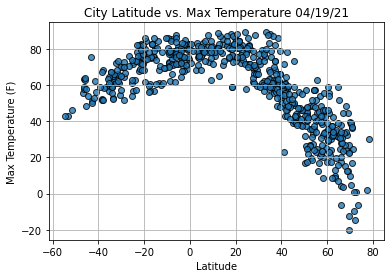

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

## Humidity vs Latitude scatter

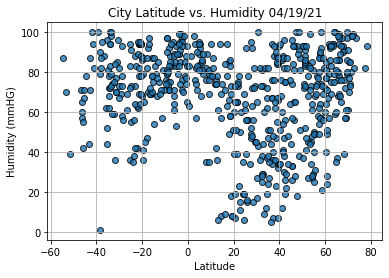

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (mmHG)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

## Cloudiness vs Latitude Scatter

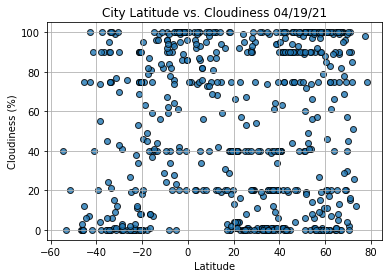

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

## Wind Speed vs Latitude Scatter

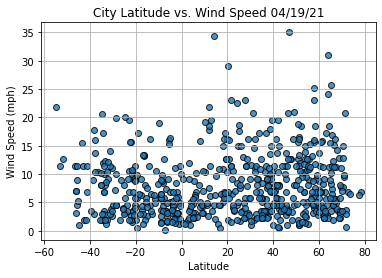

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()